# Heart Disease Prediction using Logistic Regression

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [11]:
pwd

'C:\\Users\\user\\Desktop\\ml projects\\heart attack prediction'

In [12]:
train = pd.read_csv(r"C:\\Users\\user\\Desktop\\ml projects\\heart attack prediction\Heart_Disease_Prediction.csv")

In [13]:
train.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [14]:
train.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [15]:
train.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [16]:
train.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [17]:
train.shape

(4238, 16)

In [18]:
train.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [19]:
train = train.dropna()

In [20]:
train.shape

(3656, 16)

In [21]:
train.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [22]:
X = train.drop('TenYearCHD', inplace=False, axis=1)
print(X.columns)
print("*"*100)
y = train['TenYearCHD']
print("Shape of label y: ",y.shape)
print("Shape of Features X: ",X.shape)

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')
****************************************************************************************************
Shape of label y:  (3656,)
Shape of Features X:  (3656, 15)


In [23]:
X.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')

In [24]:
unique_ele, unique_count = np.unique(y,return_counts=True)
print("Frequency of unique values:")
print(np.asarray((unique_ele, unique_count)))

Frequency of unique values:
[[   0    1]
 [3099  557]]


In [25]:
from sklearn.model_selection import train_test_split

X_1, X_test, y_1, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train, X_cv, y_train, y_cv = train_test_split(X_1,y_1,test_size= 0.2, random_state=42)

print("X_train shape: ",X_train.shape, "y_train shape: ",y_train.shape)
print("X_cv shape: ",X_cv.shape, "y_cv shape: ",y_cv.shape)
print("X_test shape: ",X_test.shape, "y_test shape: ",y_test.shape)

X_train shape:  (2339, 15) y_train shape:  (2339,)
X_cv shape:  (585, 15) y_cv shape:  (585,)
X_test shape:  (732, 15) y_test shape:  (732,)


In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_trainS = sc.fit_transform(X_train)
X_1S = sc.fit_transform(X_1)
X_cvS = sc.transform(X_cv)
X_testS = sc.transform(X_test)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
alpha = [10**x for x in range(-4,4,1)]
acc = []
for c in alpha:
  clf = LogisticRegression(penalty='l2',tol=0.1, C=c,max_iter=1000)
  clf.fit(X_trainS,y_train)
  y_pred = clf.predict(X_cvS)
  score = accuracy_score(y_pred,y_cv)
  acc.append(score)
  print(score)


0.8341880341880342
0.8341880341880342
0.8393162393162393
0.8358974358974359
0.8358974358974359
0.8358974358974359
0.8358974358974359
0.8358974358974359


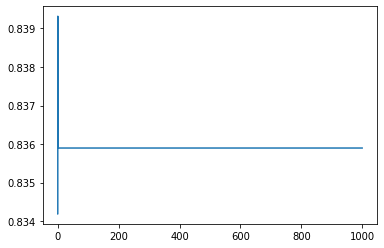

In [28]:
import matplotlib.pyplot as plt
plt.plot(alpha,acc)

In [29]:
optimalC = alpha[acc.index(max(acc))]
print(optimalC)

0.01


In [30]:
clf = LogisticRegression(penalty='l2',tol=0.0001, C=optimalC,max_iter=1000)
clf.fit(X_trainS,y_train)
y_pred = clf.predict(X_testS)
score = accuracy_score(y_pred,y_test)
print(score)

0.837431693989071


In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred,y_test)

array([[609, 118],
       [  1,   4]], dtype=int64)

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91       727
           1       0.03      0.80      0.06         5

    accuracy                           0.84       732
   macro avg       0.52      0.82      0.49       732
weighted avg       0.99      0.84      0.91       732



In [33]:
clf.coef_

array([[ 0.21313974,  0.4446374 , -0.05161668,  0.08465393,  0.10968395,
         0.05682529,  0.05883378,  0.15467301,  0.06338828,  0.08839534,
         0.18886649,  0.00951525,  0.04094719, -0.08031755,  0.11156453]])

In [34]:
sample_data = X_testS[3]

print(type(sample_data))
point = np.reshape(sample_data, (1,15))

<class 'numpy.ndarray'>


In [35]:
classLabel = clf.predict(point)
print(classLabel)

[0]


In [37]:
clf.predict_proba(point)

array([[0.94746109, 0.05253891]])